<a href="https://colab.research.google.com/github/ir1ss/DeepLearningWithPython/blob/main/bostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_target) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(404, 13)

In [ ]:
test_data.shape

(102, 13)

In [ ]:
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /= std

In [ ]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [ ]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 10
all_scores = []

In [ ]:
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
      train_data[(i+1) * num_val_samples:]],
      axis = 0
  )
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
      train_targets[(i+1) * num_val_samples:]],
      axis = 0
  )
  model = build_model()
  model.fit(
      partial_train_data,
      partial_train_targets,
      epochs = num_epochs,
      batch_size = 1,
      verbose = 0
  )
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
all_scores

[2.2513532638549805, 2.5787713527679443, 2.6621317863464355, 2.766429901123047]

In [ ]:
np.mean(all_scores)

2.564671576023102

In [19]:
num_epochs = 500
all_mae_history = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
      train_data[(i+1) * num_val_samples:]],
      axis = 0
  )
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
      train_targets[(i+1) * num_val_samples:]],
      axis = 0
  )
  model = build_model()
  history = model.fit(
      partial_train_data,
      partial_train_targets,
      epochs = num_epochs,
      validation_data = (val_data, val_targets),
      batch_size = 1,
      verbose = 0
  )
  mae_history = history.history['val_mae']
  all_mae_history.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [21]:
len(all_mae_history)

4

In [22]:
len(all_mae_history[0])

500

In [42]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)
]

In [43]:
len(average_mae_history)

500

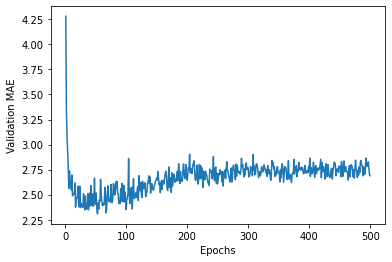

In [44]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [47]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

In [48]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

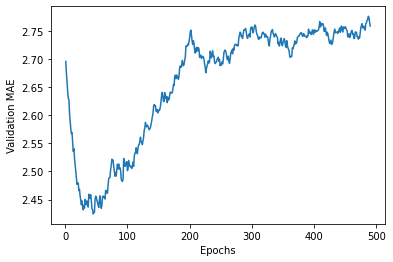

In [49]:
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [70]:
model = build_model()
model.fit(
    train_data,
    train_targets,
    epochs=80,
    batch_size=16,
    verbose=0
)

In [71]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_target)

4/4 [==============================] - 0s 3ms/step - loss: 17.9600 - mae: 2.6471
